This notebook assumes you are using sims_maf version >= 1.0, and have 'setup sims_maf' in your shell. 

Here we demonstrate reading metric data from disk and using that data to generate new combinations of plots. The metric data used here can be generated using the 'NVisits/Coadd ..' notebook. 

This notebook demonstrates using the PlotHandler class!

First import numpy, matplotlib and the necessary MAF modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

##Read MetricBundle data from disk##

It is easy to read previously calculated MetricBundle data from disk. Let's see what data is available in the directory 'allfilters_test', which was created by the ipython notebook 'NVisitsCoadd_AllFilters_DitherComparison.ipynb'.  

Remember the sims_maf metric data files are saved as '.npz' files.

In [3]:
outDir = 'allfilters_test'
!ls $outDir/*npz

allfilters_test/enigma_1189_CoaddM5_g_Dithered_HEAL.npz allfilters_test/enigma_1189_Nvisits_g_Dithered_HEAL.npz
allfilters_test/enigma_1189_CoaddM5_g_HEAL.npz          allfilters_test/enigma_1189_Nvisits_g_HEAL.npz
allfilters_test/enigma_1189_CoaddM5_i_Dithered_HEAL.npz allfilters_test/enigma_1189_Nvisits_i_Dithered_HEAL.npz
allfilters_test/enigma_1189_CoaddM5_i_HEAL.npz          allfilters_test/enigma_1189_Nvisits_i_HEAL.npz
allfilters_test/enigma_1189_CoaddM5_r_Dithered_HEAL.npz allfilters_test/enigma_1189_Nvisits_r_Dithered_HEAL.npz
allfilters_test/enigma_1189_CoaddM5_r_HEAL.npz          allfilters_test/enigma_1189_Nvisits_r_HEAL.npz
allfilters_test/enigma_1189_CoaddM5_u_Dithered_HEAL.npz allfilters_test/enigma_1189_Nvisits_u_Dithered_HEAL.npz
allfilters_test/enigma_1189_CoaddM5_u_HEAL.npz          allfilters_test/enigma_1189_Nvisits_u_HEAL.npz
allfilters_test/enigma_1189_CoaddM5_y_Dithered_HEAL.npz allfilters_test/enigma_1189_Nvisits_y_Dithered_HEAL.npz
allfilters_test/enigma_1189_

Okay, let's read all of the 'coadded depth' metric files back into `MetricBundle` objects.

In [4]:
bList = []
filenames = !ls $outDir/*Coadd*npz
for filename in filenames:
    # Create an empty metric bundle, which we will use to read the data.
    mB = metricBundles.emptyMetricBundle()
    # Read the data
    mB.read(filename)
    # Add this to our list of metricBundles.
    bList.append(mB)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


A list is nice, but it is inconvenient if we want to access individual items by "name", so let's translate this to a dictionary. I'm going to key the dictionary by the metadata for each metricBundle, as I know this identifies each item uniquely and is the 'handle' that I'd like to use.

In [5]:
myBundles = {}
for mB in bList:
    key = mB.metadata.strip()
    myBundles[key] = mB
print myBundles.keys()

['g', 'r Dithered', 'i', 'i Dithered', 'z Dithered', 'r', 'u', 'u Dithered', 'y', 'y Dithered', 'z', 'g Dithered']


##Make new plots##

Now that we have the metric data sitting in metricBundles in memory -- 

In [6]:
myBundles['g'].metricValues

masked_array(data = [-- -- -- ..., 25.970594806151368 25.970594806151368 25.970594806151368],
             mask = [ True  True  True ..., False False False],
       fill_value = -1.6375e+30)

.. let's try making some new plots.  Let's combine histograms of the coadded depth in g band, both dithered and undithered.

First we create a 'PlotHandler' object. This class defines some methods to take a user-specified collection of metricBundles and then generate user-specified plots (MAF Plotter functions). The benefit to using the plotHandler is that 
* it can generate plot labels (x/y axis, titles, legend labels) automatically
* it will loop through the specified metricBundles, adding each of them into the plots.
* it records the plots which are created into the resultsDb database, so that 'showMaf.py' can find and display them on screen
* it handles saving the plots to disk, as well as generating thumbnail pngs which are useful for showMaf.

In [8]:
plotOutDir = 'allfilters_test_plots'
!mkdir -p $plotOutDir
resultsDb = db.ResultsDb(outDir=plotOutDir)
ph = plots.PlotHandler(outDir = plotOutDir)

We can use the plotHandler to make all the plots available for a given metricBundle automatically, saving the results to our plotOutDir.

monopole: 27.0096  dipole: lon: 168.621, lat: -79.4714, amp: 0.155108


{'Histogram': 2, 'PowerSpectrum': 3, 'SkyMap': 1}

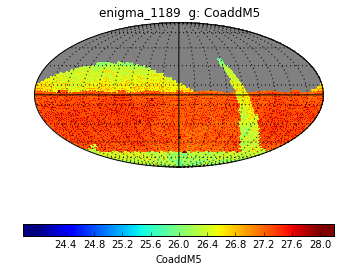

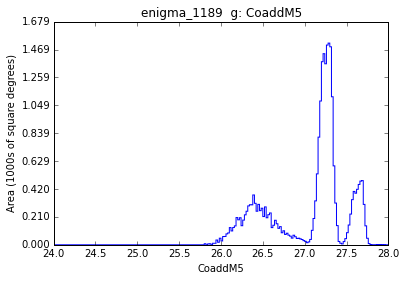

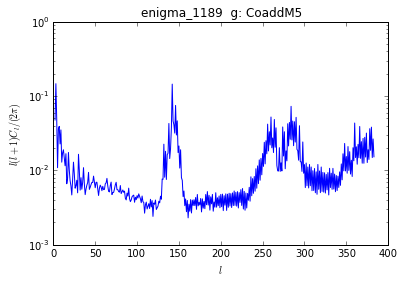

In [9]:
myBundles['g'].plot(plotHandler=ph)

Or we can use the plotHandler to generate the specific plot we want, containing a specific set of metricBundles and generating a specific plot. To do this, we set the metricBundles ('plotHandler.setMetricBundles) and then pass a Plotter object to the PlotHandler.plot method. Available plotters include the following (generally, plotters have specific slicers that they will work with!).

In [10]:
import inspect
for name, obj in inspect.getmembers(plots):
    if inspect.isclass(obj):
        if name != 'BasePlotter' and name != 'PlotHandler':
            print name

BaseHistogram
BaseSkyMap
FOPlot
HealpixHistogram
HealpixPowerSpectrum
HealpixSDSSSkyMap
HealpixSkyMap
HourglassPlot
OneDBinnedData
OneDSubsetData
OpsimHistogram
SummaryHistogram
TwoDSubsetData


We want to generate histograms of the healpix-slicer based metric data in our metric bundles, so we'll use the 'HealpixHistogram' plotter.

1

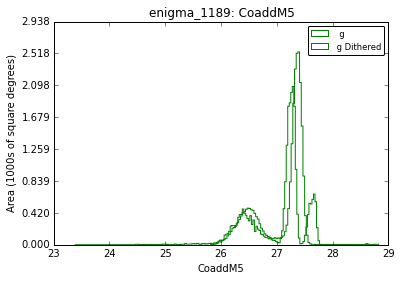

In [11]:
plotter = plots.HealpixHistogram()
# Make histogram of g dithered and non-dithered
ph.setMetricBundles([myBundles['g'], myBundles['g Dithered']])
ph.plot(plotter)

We probably want to tweak this plot a bit. Add different colors for dithered vs. non-dithered lines, change the plot limits, and update the plot legend labels. We can do all this with plotDicts, applied to the metricBundles and passed to the plotHandler for a particular plot. 

First we'll set up our legend labels, adding information like the 'median' coadded depth. We can do this by first calculating the median for each metricBundle (using summaryMetrics) ..

In [12]:
# Calculate the mean, median and RMS for all metricBundles. 
summaryMetrics = [metrics.MedianMetric()]
for mB in myBundles.itervalues():
    mB.setSummaryMetrics(summaryMetrics)
    mB.computeSummaryStats()

.. and then updating the plotDict for each metricBundle with the new plot labels.

In [13]:
for mB in myBundles.itervalues():
    updatePlotDict = {'label':'%s: Mean %.2f' %(mB.metadata.strip(), mB.summaryValues['Median'])}
    mB.setPlotDict(updatePlotDict)

Then regenerate the plot, using an additional plotDict for this particular plot. 

1

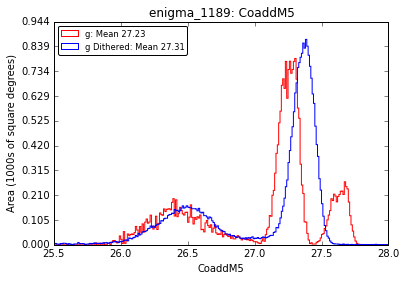

In [14]:
updatePlotDict = {'xMin':25.5, 'xMax':28, 'binsize':0.01, 'legendloc':'upper left', 
                  'colors':['r', 'b']}
ph.plot(plots.HealpixHistogram(), plotDict=updatePlotDict)

---
We can also generate skymaps of individual metricBundles. 

2

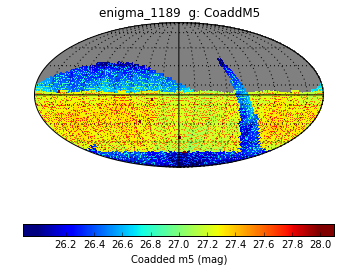

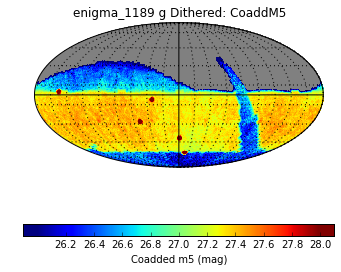

In [15]:
# Plot the coadded depth on the sky, non-dithered.
ph.setMetricBundles([myBundles['g']])
updatePlotDict = {'colorMin':26, 'colorMax':28, 'xlabel':'Coadded m5 (mag)'}
ph.plot(plots.HealpixSkyMap(), plotDict=updatePlotDict)
# Plot the coadded depth on the sky, dithered.
ph.setMetricBundles([myBundles['g Dithered']])
updatePlotDict = {'colorMin':26, 'colorMax':28, 'xlabel':'Coadded m5 (mag)'}
ph.plot(plots.HealpixSkyMap(), plotDict=updatePlotDict)

And it can be useful to realize that we can access the metric data values directly. In the case of metrics calculated with a healpix slicer, we can use healpy's plotting functions to make additional "zoomed in" plots.

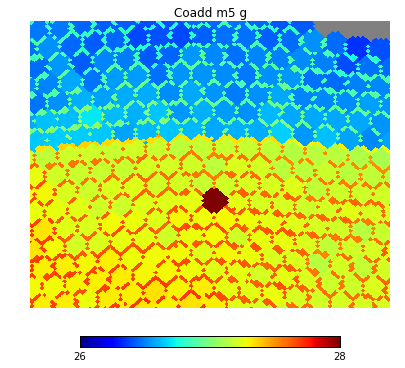

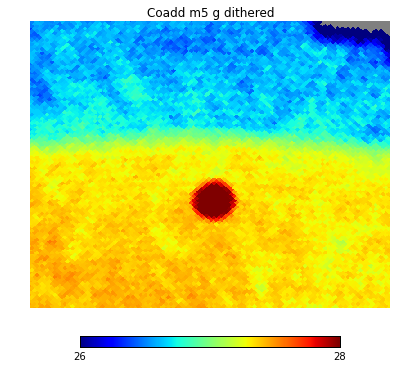

In [16]:
# Zoom in.
import healpy as hp
# Use the metricBundle (masked numpy array) metric data values directly.
hp.cartview(myBundles['g'].metricValues, lonra=[10, 60], latra=[-20, 20], min=26., max=28., 
            flip='astro', title='Coadd m5 g')
hp.cartview(myBundles['g Dithered'].metricValues, lonra=[10, 60], latra=[-20, 20], min=26., max=28., 
            flip='astro', title='Coadd m5 g dithered')

We could also play with the metric values and change the mask. 

In [17]:
# We could mask areas where the depth falls below X percentile. 
newSummaryMetric = [metrics.PercentileMetric(percentile=10, metricName='cutoff')]
for k in myBundles.iterkeys():
    if k.endswith('ithered'):
        myBundles[k].setSummaryMetrics(newSummaryMetric)
        myBundles[k].computeSummaryStats()
        print k, myBundles[k].summaryValues['cutoff']
        mask = np.where(myBundles[k].metricValues < myBundles[k].summaryValues['cutoff'])[0]
        myBundles[k].metricValues.mask[mask] = True

r Dithered 26.09464863
i Dithered 25.4918554309
z Dithered 24.7441903308
u Dithered 25.2518003345
y Dithered 23.2655295769
g Dithered 26.3608251499


1

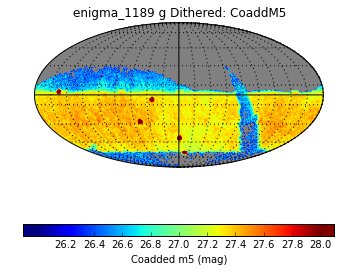

In [18]:
ph.setMetricBundles([myBundles['g Dithered']])
ph.plot(plots.HealpixSkyMap(), plotDict=updatePlotDict)

In [19]:
!ls $plotOutDir

enigma_1189_CoaddM5_g_Dithered_HEAL_SkyMap.pdf                 thumb.enigma_1189_CoaddM5_g_Dithered_HEAL_SkyMap.png
enigma_1189_CoaddM5_g_HEAL_Histogram.pdf                       thumb.enigma_1189_CoaddM5_g_HEAL_Histogram.png
enigma_1189_CoaddM5_g_HEAL_PowerSpectrum.pdf                   thumb.enigma_1189_CoaddM5_g_HEAL_PowerSpectrum.png
enigma_1189_CoaddM5_g_HEAL_SkyMap.pdf                          thumb.enigma_1189_CoaddM5_g_HEAL_SkyMap.png
enigma_1189_CoaddM5_g_g_Dithered_HEAL_ComboHistogram.pdf       thumb.enigma_1189_CoaddM5_g_g_Dithered_HEAL_ComboHistogram.png
resultsDb_sqlite.db
